## Project Overview

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (yes) or not ("no") subscribed.

#### There are four datasets:

1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1). and 20 inputs.

3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs)

The smallest datasets are provided to test more computationally demanding machine learning algorithms (eg, SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)

#### This dataset contains:

#### Input variables:

### bank client data:

1. age (numeric)

2. job type of job (categorical: 'admin.','blue-collar','entrepreneur', 'housemaid', 'management', 'retired', 'self- employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

3. marital: marital status (categorical: 'divorced','married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)

4. education (categorical:'basic.4y', 'basic.6y', 'basic.9y','high.school', 'illiterate', 'professional.course','university.degree','unknown')

5. default: has credit in default? (categorical: 'no', 'yes', 'unknown')

6. housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

7. loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

### related with the last contact of the current campaign:

8. contact: contact communication type (categorical: 'cellular', 'telephone')

9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10. day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')

11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.
Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14.  previous: number of contacts performed before this campaign and for this client (numeric)

15. poutcome: outcome of the previous marketing campaign (categorical: 'failure' 'nonexistent', 'success')

15. poutcome: outcome of the previous marketing campaign (categorical: 'failure' 'nonexistent', 'success')

### social and economic context attributes

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)

17.  cons.price.idx: consumer price index - monthly indicator (numeric)

18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19.  euribor3m: euribor 3 month rate - daily indicator (numeric)

20. nr.employed: number of employees - quarterly indicator (numeric)

### output variable (desired target):

21. y-has the client subscribed a term deposit? (binary: 'yes', 'no')

## Bank Marketing Data Set : Simple Exploratory Data Analysis (EDA)

#### Import Library
Untuk memulai pengerjaan kita akan mengimport semua library yang dibutuhkan.


In [2]:
# import library dan analisis data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#### Load Dataset
Upload dataset yang telah di download dengan format csv


In [5]:
# import data --> Bank yang additional full
data_df = pd.read_csv("/bank_additional_full.csv", sep=";")
data_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
# menampilkan lima baris pertama dari DataFrame
data_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#### Identify the shape of the dataset

In [ ]:
# bentuk dimensi dataset yang menerangkan jumlah data dan kategori
data_df.shape

(41188, 21)

In [ ]:
# memberikan ringkasan tentang dataset, termasuk jumlah data, tipe data kolom, dan penggunaan memori.
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

SUM: Terdapat beberapa nilai yang hilang pada beberapa atribut kategorikal, semuanya dikodekan dengan label "unknown". Nilai-nilai yang hilang ini dapat dianggap sebagai label kelas yang mungkin atau menggunakan teknik penghapusan atau imputasi.

Dari informasi di atas, dapat dilihat bahwa dari 21 kolom yang ada dalam dataset, terdapat 10 tipe data Numerik dan 11 tipe data Kategorikal.

In [7]:
numeric_columns = data_df.select_dtypes(include=np.number).columns.tolist()
categorical_columns = data_df.select_dtypes(exclude=np.number).columns.tolist()

print ("numeric_columns = ", numeric_columns)
print ("categorical_columnsn = ", categorical_columns)


numeric_columns =  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_columnsn =  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


Tipe Data Numerik/Kuantitatif: Data numerik mengacu pada data yang berupa angka, bukan dalam bentuk bahasa atau deskriptif. Contoh: 'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'.

Tipe Data Kategorikal/Kualitatif: Data kategorikal merujuk pada jenis data yang dapat disimpan dan diidentifikasi berdasarkan nama atau label yang diberikan. Contoh: 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'

#### Identify missing value

In [8]:
# Cek jumlah baris dan kolom
row, col = data_df.shape
cek_baris_kolom = pd.DataFrame({'Jumlah Baris': [row], 'Jumlah Kolom': [col]})
cek_baris_kolom

,Jumlah Baris,Jumlah Kolom
0,41188,21


In [ ]:
data_df.count()

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays             41188
previous          41188
poutcome          41188
emp.var.rate      41188
cons.price.idx    41188
cons.conf.idx     41188
euribor3m         41188
nr.employed       41188
y                 41188
dtype: int64

In [9]:
data_df.isna().sum() # mendeteksi keberadaan nilai kosong


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Dari informasi di atas, kita dapat menyimpulkan bahwa Dataset kita tidak memiliki nilai yang hilang.

In [10]:
# cek nilai yang duplikat
print(data_df.duplicated().value_counts())

False    41176
True        12
dtype: int64


Terdapat 12 entri duplikat dalam Dataset kita, oleh karena itu kita perlu menghapus duplikat tersebut untuk pemahaman dan prediksi yang lebih baik.

In [11]:
#umlah nilai distinct dalam variabel-variabe
for i, column in enumerate(data_df.columns):
    print("{}. ".format(i) + str(column.title()) + ": {}". format(data_df[column].nunique()))

0. Age: 78
1. Job: 12
2. Marital: 4
3. Education: 8
4. Default: 3
5. Housing: 3
6. Loan: 3
7. Contact: 2
8. Month: 10
9. Day_Of_Week: 5
10. Duration: 1544
11. Campaign: 42
12. Pdays: 27
13. Previous: 8
14. Poutcome: 3
15. Emp.Var.Rate: 10
16. Cons.Price.Idx: 26
17. Cons.Conf.Idx: 26
18. Euribor3M: 316
19. Nr.Employed: 11
20. Y: 2


#### Describe the dataset

In [12]:
data_df.describe () # untuk menghasilkan ringkasan statistik

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
# Kondisi pelanggan menerima tawaran dari bank dengan set y = yes
temp_descriptive = data_df[data_df['y'] == 'yes']
temp_descriptive = temp_descriptive.groupby(['marital', 'job'])['age'].agg(
    [np.mean, lambda x: x.mode().iloc[0], 'count']).reset_index()

temp_descriptive.columns = ['marital', 'job', 'mean_age', 'mode_age', 'count']
temp_descriptive

,marital,job,mean_age,mode_age,count
0,divorced,admin.,44.878788,41,132
1,divorced,blue-collar,42.037736,33,53
2,divorced,entrepreneur,44.857143,35,14
3,divorced,housemaid,57.000000,38,16
4,divorced,management,46.692308,53,39
5,divorced,retired,72.739130,88,92
6,divorced,self-employed,41.875000,25,16
7,divorced,services,43.484848,44,33
8,divorced,student,35.666667,37,3
9,divorced,technician,40.738462,41,65


### Distribution Data

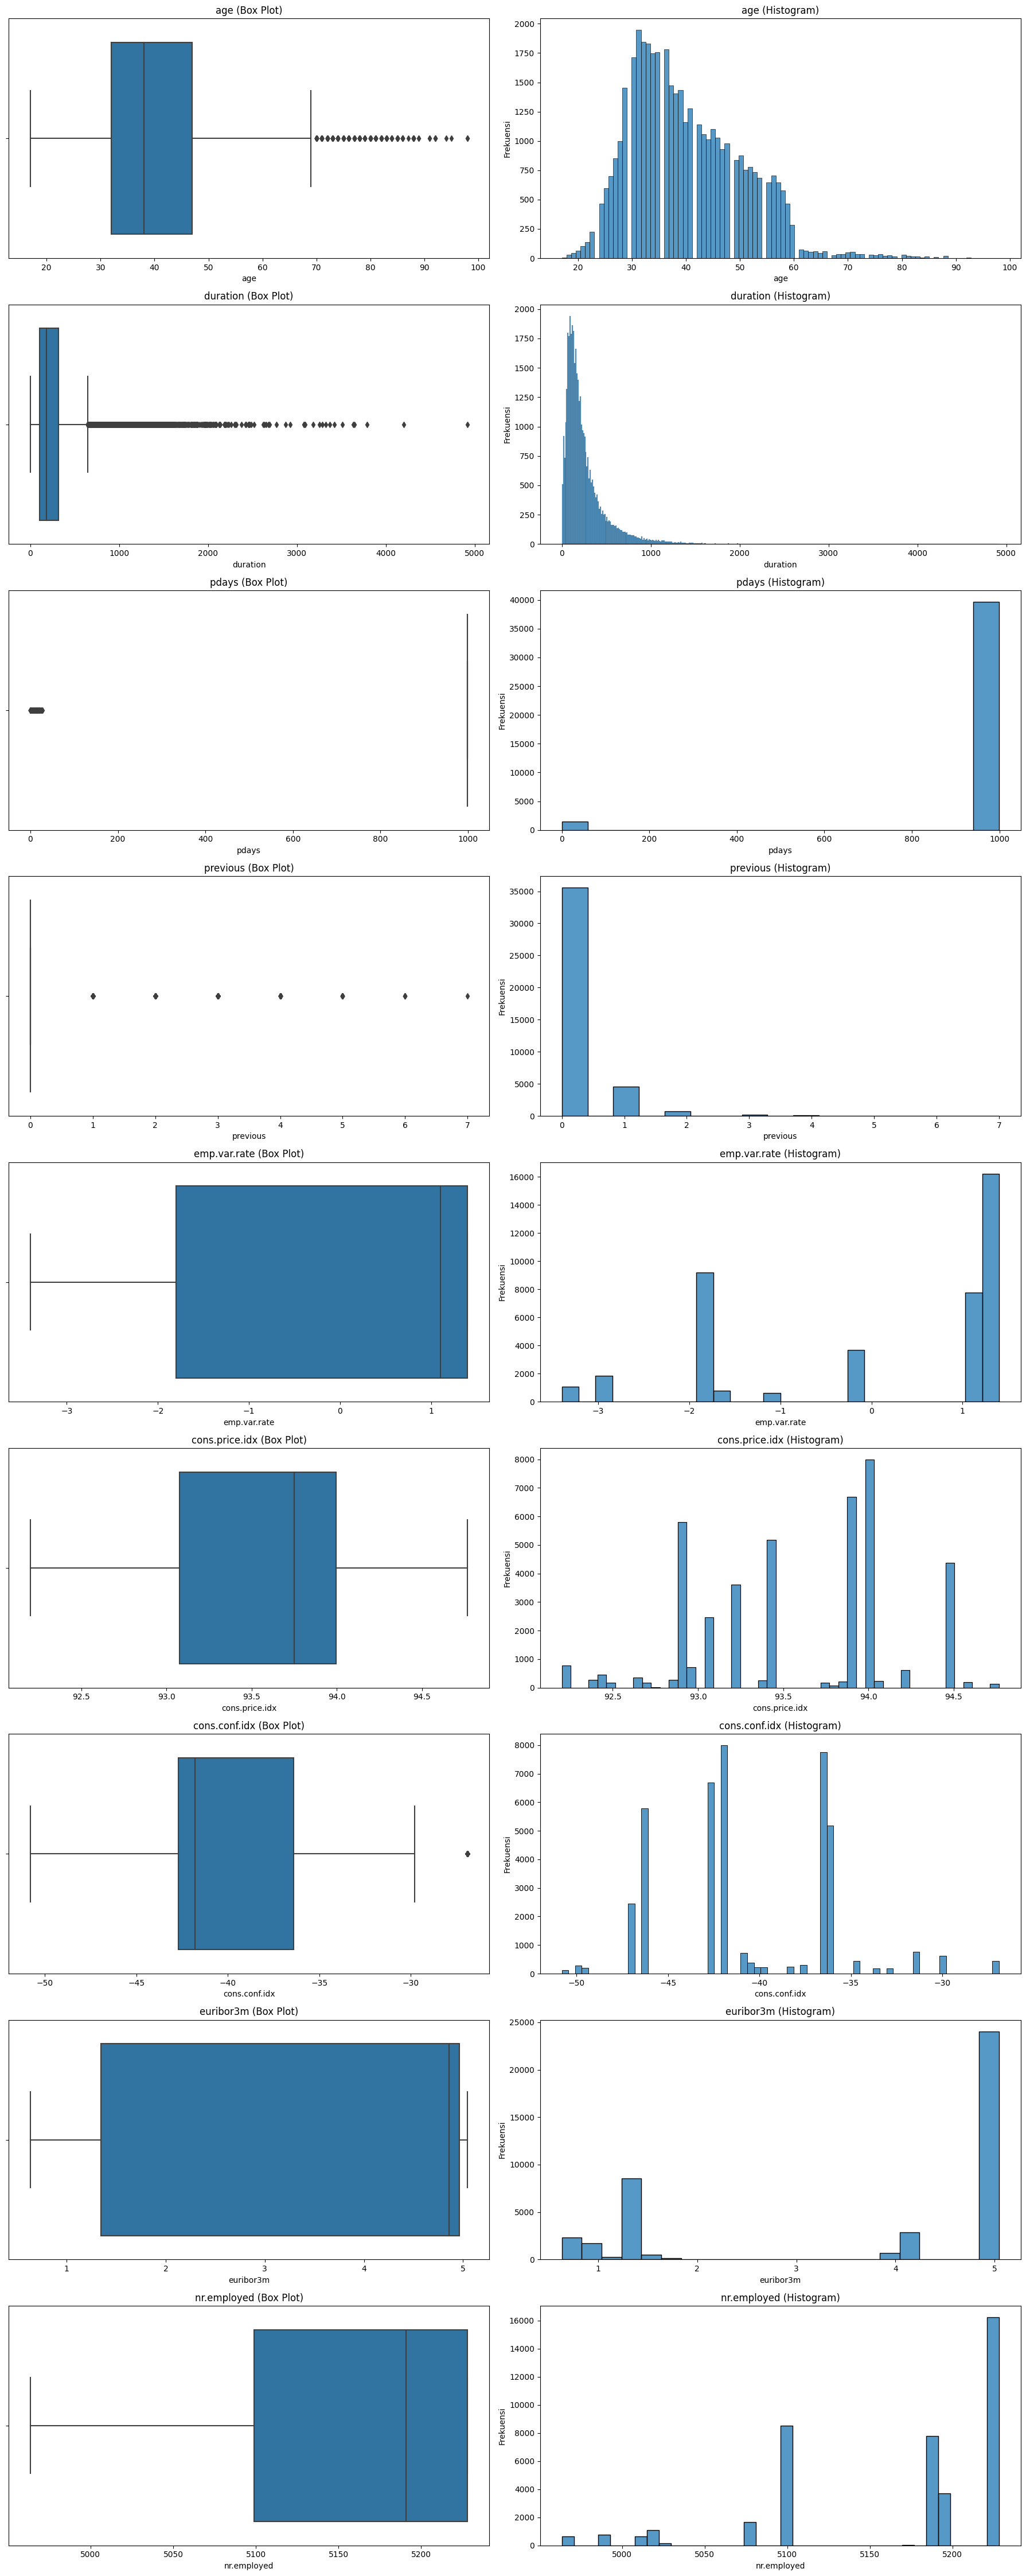

In [14]:
numeric_variables = ['age', 'duration', 'pdays', 'previous',
                     'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

num_rows = len(numeric_variables)
num_cols = 2

plt.figure(figsize=(18, 5 * num_rows))

for i, num_var in enumerate(numeric_variables):
    plt.subplot(num_rows, num_cols, i * num_cols + 1)
    sns.boxplot(data=data_df, x=num_var, orient='h')
    plt.xlabel(num_var)
    plt.title(f"{num_var} (Box Plot)")

    plt.subplot(num_rows, num_cols, i * num_cols + 2)
    sns.histplot(data=data_df, x=num_var, kde=False)
    plt.xlabel(num_var)
    plt.ylabel('Frekuensi')
    plt.title(f"{num_var} (Histogram)")

plt.tight_layout()
plt.show()

### Data Processing

In [16]:
label_encoder = LabelEncoder()

temp = data_df.copy()
for kolom in data_df.columns:
    if temp[kolom].dtype == 'object':
        temp.loc[:, kolom] = label_encoder.fit_transform(temp[kolom])

temp

<ipython-input-16-2e38d8ecac47>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp.loc[:, kolom] = label_encoder.fit_transform(temp[kolom])
<ipython-input-16-2e38d8ecac47>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  temp.loc[:, kolom] = label_encoder.fit_transform(temp[kolom])
<ipython-input-16-2e38d8ecac47>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if colu

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [17]:
kolom = temp.columns
temp[kolom] = temp[kolom].astype(float)
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  float64
 2   marital         41188 non-null  float64
 3   education       41188 non-null  float64
 4   default         41188 non-null  float64
 5   housing         41188 non-null  float64
 6   loan            41188 non-null  float64
 7   contact         41188 non-null  float64
 8   month           41188 non-null  float64
 9   day_of_week     41188 non-null  float64
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  float64
 14  poutcome        41188 non-null  float64
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Correlation Variabel

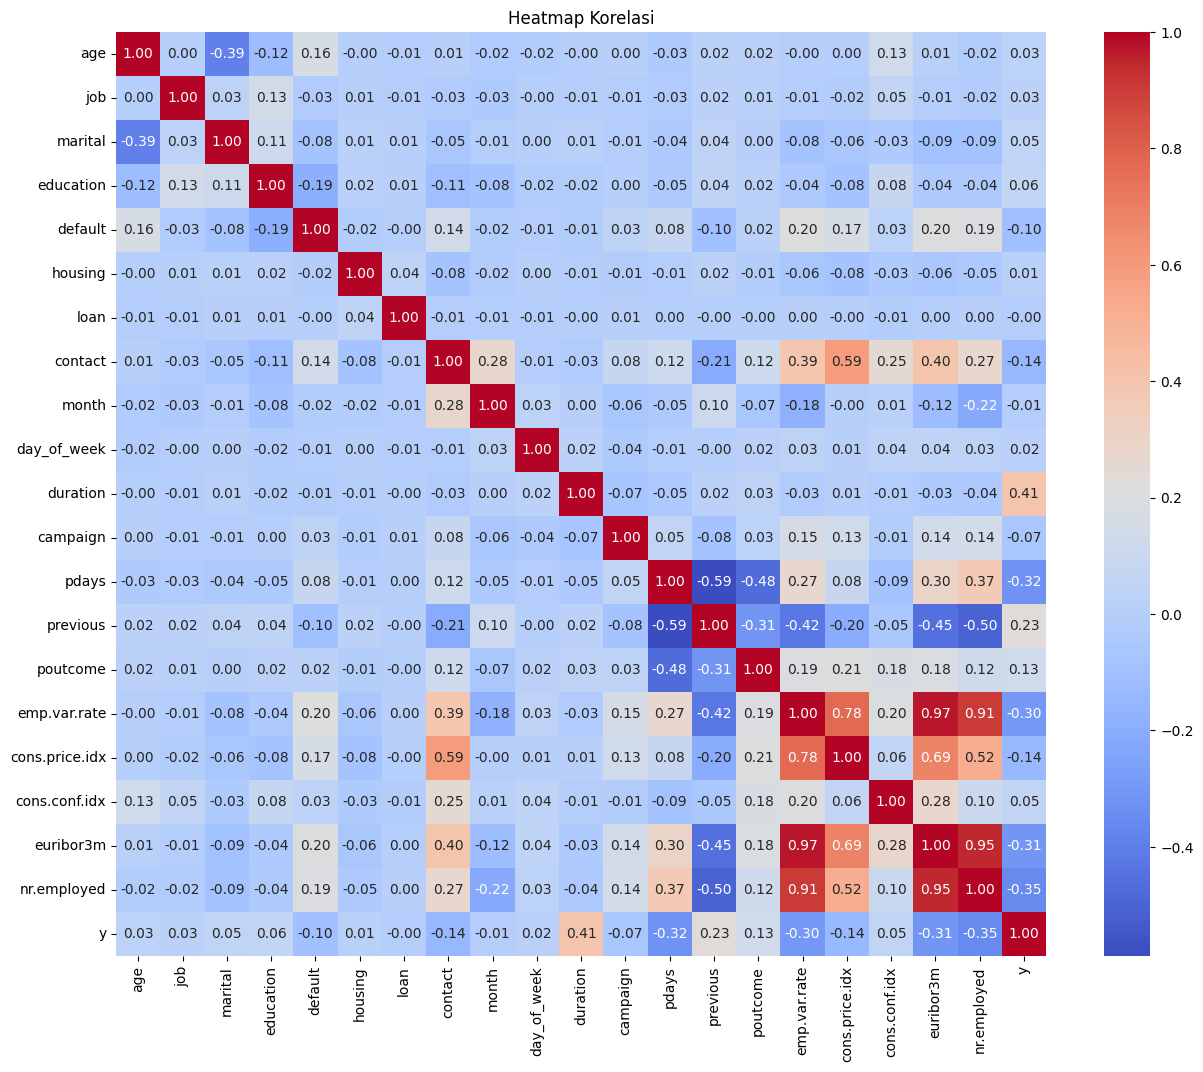

In [18]:
correlation_matrix = temp.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

### Pemilihan Fitur

In [19]:
feature_cols = ['marital', 'education', 'loan', 'contact',
                'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'default', 'poutcome']

X = temp[feature_cols]
y = temp['y']

X

,marital,education,loan,contact,month,day_of_week,duration,campaign,pdays,previous,default,poutcome
0,1.0,0.0,0.0,1.0,6.0,1.0,261.0,1.0,999.0,0.0,0.0,1.0
1,1.0,3.0,0.0,1.0,6.0,1.0,149.0,1.0,999.0,0.0,1.0,1.0
2,1.0,3.0,0.0,1.0,6.0,1.0,226.0,1.0,999.0,0.0,0.0,1.0
3,1.0,1.0,0.0,1.0,6.0,1.0,151.0,1.0,999.0,0.0,0.0,1.0
4,1.0,3.0,2.0,1.0,6.0,1.0,307.0,1.0,999.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1.0,5.0,0.0,0.0,7.0,0.0,334.0,1.0,999.0,0.0,0.0,1.0
41184,1.0,5.0,0.0,0.0,7.0,0.0,383.0,1.0,999.0,0.0,0.0,1.0
41185,1.0,6.0,0.0,0.0,7.0,0.0,189.0,2.0,999.0,0.0,0.0,1.0
41186,1.0,5.0,0.0,0.0,7.0,0.0,442.0,1.0,999.0,0.0,0.0,1.0


### Splitting Data dan Imbalance Dataset

In [20]:
# train 80% dan test 20%
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10)


# Terapkan SMOTE untuk menangani ketidakseimbangan kelas (setelah pembagian data)
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

# Skalasi fitur
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
print('x train (baris,kolom) : ', x_train.shape)
print('x test  (baris,kolom) : ', x_test.shape)
print('\ny train (baris,kolom) : ', y_train.shape)
print('y test  (baris,kolom) : ', y_test.shape)

x train (baris,kolom) :  (58476, 12)
x test  (baris,kolom) :  (8238, 12)

y train (baris,kolom) :  (58476,)
y test  (baris,kolom) :  (8238,)


## Bank Marketing Data Set : Classification for

### LOGISTIC REGRESSION

### Penginplementasian Model Logistic Regression

In [22]:
model_Logistic_Regression = LogisticRegression(solver='liblinear', C=10.0)
model_Logistic_Regression.fit(x_train, y_train)

LogisticRegression(C=10.0, solver='liblinear')

In [23]:
# x_test
y_pred = model_Logistic_Regression.predict(x_test)

print("Jumlah nilai 1 dalam y_pred : ", np.count_nonzero(y_pred == 1))
print("Jumlah nilai 0 dalam y_pred : ", np.count_nonzero(y_pred == 0))

Jumlah nilai 1 dalam y_pred :  1790
Jumlah nilai 0 dalam y_pred :  6448


In [24]:
# x_train
y_pred_train = model_Logistic_Regression.predict(x_train)
print("Jumlah nilai 1 dalam y_pred_train : ",
      np.count_nonzero(y_pred_train == 1))
print("Jumlah nilai 0 dalam y_pred_train : ",
      np.count_nonzero(y_pred_train == 0))

Jumlah nilai 1 dalam y_pred_train :  26901
Jumlah nilai 0 dalam y_pred_train :  31575


### Accuracy, Precision, Recall, F1-Score

In [25]:
# Evaluasi model pada data x_test
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("F1-Score  : ", f1)
print('Recall    : ', recall)
print('Precision : ', precision)
print('Accuracy  : ', accuracy)
print()
print(classification_report(y_test, y_pred))

F1-Score  :  0.5055187637969094
Recall    :  0.740301724137931
Precision :  0.38379888268156426
Accuracy  :  0.8368536052439912

              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90      7310
         1.0       0.38      0.74      0.51       928

    accuracy                           0.84      8238
   macro avg       0.67      0.79      0.70      8238
weighted avg       0.90      0.84      0.86      8238



### Receiver Operating Characteristic (ROC)

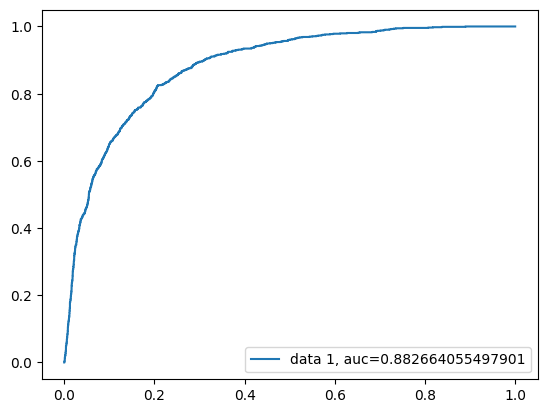

In [26]:
y_pred_proba = model_Logistic_Regression.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Confusion Matrix

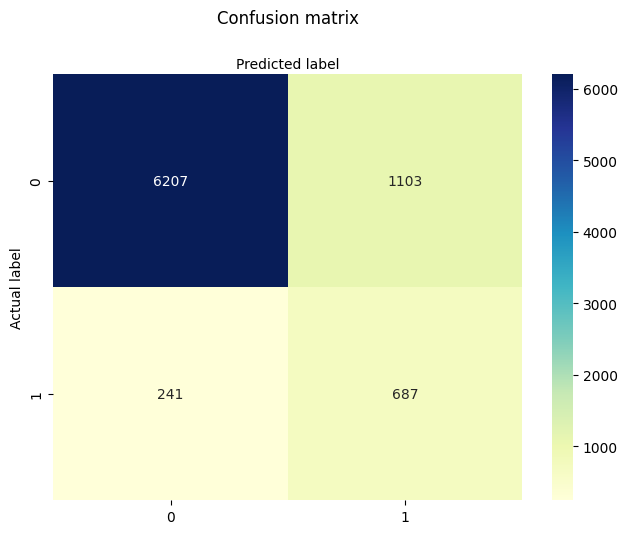

In [27]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## K-Nearest Neighbors

### Penginplementasian Model K-Nearest Neighbors

In [28]:
model_K_Nearest_Neighbors = KNeighborsClassifier(n_neighbors=3)
model_K_Nearest_Neighbors .fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
y_pred = model_K_Nearest_Neighbors.predict(x_test)

print("Jumlah nilai 1 dalam y_pred : ", np.count_nonzero(y_pred == 1))
print("Jumlah nilai 0 dalam y_pred : ", np.count_nonzero(y_pred == 0))

Jumlah nilai 1 dalam y_pred :  1263
Jumlah nilai 0 dalam y_pred :  6975


In [30]:
y_pred_train = model_K_Nearest_Neighbors.predict(x_train)
print("Jumlah nilai 1 dalam y_pred_train : ",
      np.count_nonzero(y_pred_train == 1))
print("Jumlah nilai 0 dalam y_pred_train : ",
      np.count_nonzero(y_pred_train == 0))

Jumlah nilai 1 dalam y_pred_train :  30389
Jumlah nilai 0 dalam y_pred_train :  28087


### Accuracy, Precision, Recall, F1-Score

In [31]:
# Evaluasi model pada data x_test
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("F1-Score  : ", f1)
print('Recall    : ', recall)
print('Precision : ', precision)
print('Accuracy  : ', accuracy)
print()
print(classification_report(y_test, y_pred))

F1-Score  :  0.5020538566864445
Recall    :  0.5926724137931034
Precision :  0.43547110055423593
Accuracy  :  0.8675649429473173

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92      7310
         1.0       0.44      0.59      0.50       928

    accuracy                           0.87      8238
   macro avg       0.69      0.75      0.71      8238
weighted avg       0.89      0.87      0.88      8238



### Confusion Matrix

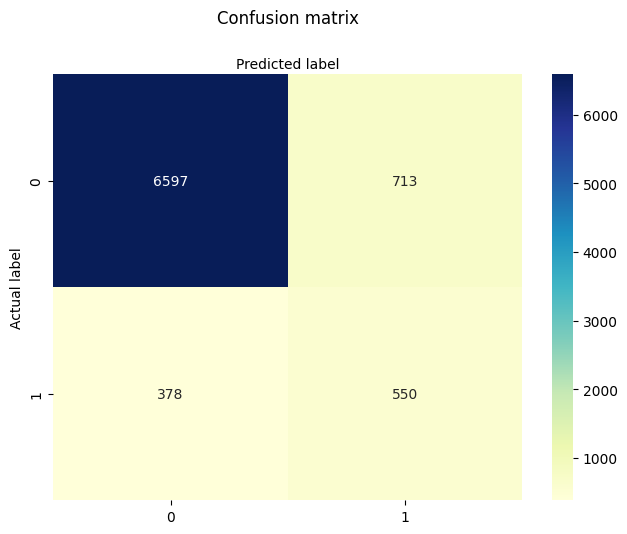

In [32]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Support Vector Machine


### Penginplementasian Model Support Vector Machine

In [33]:
model_SVM = SVC(kernel='linear')
model_SVM.fit(x_train, y_train)

SVC(kernel='linear')

In [34]:
y_pred = model_SVM.predict(x_test)

print("Jumlah nilai 1 dalam y_pred : ", np.count_nonzero(y_pred == 1))
print("Jumlah nilai 0 dalam y_pred : ", np.count_nonzero(y_pred == 0))

Jumlah nilai 1 dalam y_pred :  1701
Jumlah nilai 0 dalam y_pred :  6537


In [35]:
y_pred_train = model_SVM.predict(x_train)

print("Jumlah nilai 1 dalam y_pred_train : ",
      np.count_nonzero(y_pred_train == 1))
print("Jumlah nilai 0 dalam y_pred_train : ",
      np.count_nonzero(y_pred_train == 0))

Jumlah nilai 1 dalam y_pred_train :  26270
Jumlah nilai 0 dalam y_pred_train :  32206


### Accuracy, Precision, Recall, F1-Score

In [36]:
# Evaluasi model pada data x_test
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("F1-Score  : ", f1)
print('Recall    : ', recall)
print('Precision : ', precision)
print('Accuracy  : ', accuracy)
print()
print(classification_report(y_test, y_pred))

F1-Score  :  0.5119817421072651
Recall    :  0.7252155172413793
Precision :  0.3956496178718401
Accuracy  :  0.8442583151250304

              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91      7310
         1.0       0.40      0.73      0.51       928

    accuracy                           0.84      8238
   macro avg       0.68      0.79      0.71      8238
weighted avg       0.90      0.84      0.86      8238



### Confusion Matrix

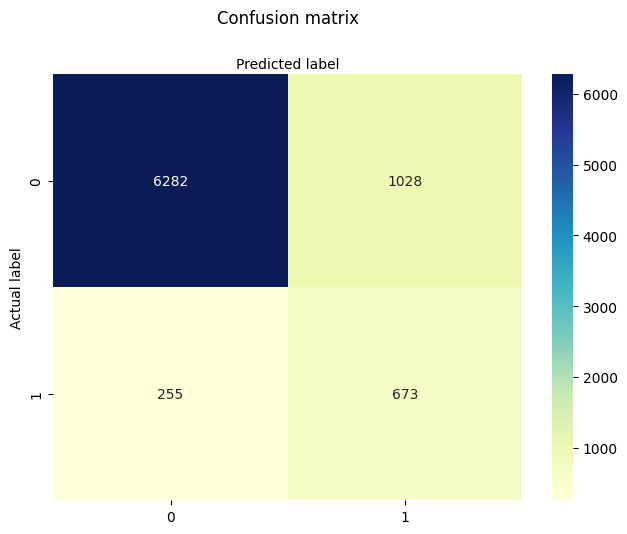

In [37]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Decision Tree

### Penginplementasian Model Decision Tree

In [38]:
model_Decision_Tree = DecisionTreeClassifier()
model_Decision_Tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [39]:
y_pred = model_Decision_Tree.predict(x_test)

print("Jumlah nilai 1 dalam y_pred : ", np.count_nonzero(y_pred == 1))
print("Jumlah nilai 0 dalam y_pred : ", np.count_nonzero(y_pred == 0))

Jumlah nilai 1 dalam y_pred :  997
Jumlah nilai 0 dalam y_pred :  7241


In [40]:
y_pred_train = model_Decision_Tree.predict(x_train)
print("Jumlah nilai 1 dalam y_pred_train : ",
      np.count_nonzero(y_pred_train == 1))
print("Jumlah nilai 0 dalam y_pred_train : ",
      np.count_nonzero(y_pred_train == 0))

Jumlah nilai 1 dalam y_pred_train :  29226
Jumlah nilai 0 dalam y_pred_train :  29250


### Accuracy, Precision, Recall, F1-Score

In [41]:
# Evaluasi model pada data x_test
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("F1-Score  : ", f1)
print('Recall    : ', recall)
print('Precision : ', precision)
print('Accuracy  : ', accuracy)
print()
print(classification_report(y_test, y_pred))

F1-Score  :  0.4446753246753247
Recall    :  0.46120689655172414
Precision :  0.4292878635907723
Accuracy  :  0.8702354940519543

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93      7310
         1.0       0.43      0.46      0.44       928

    accuracy                           0.87      8238
   macro avg       0.68      0.69      0.69      8238
weighted avg       0.87      0.87      0.87      8238



### Confusion Matrix

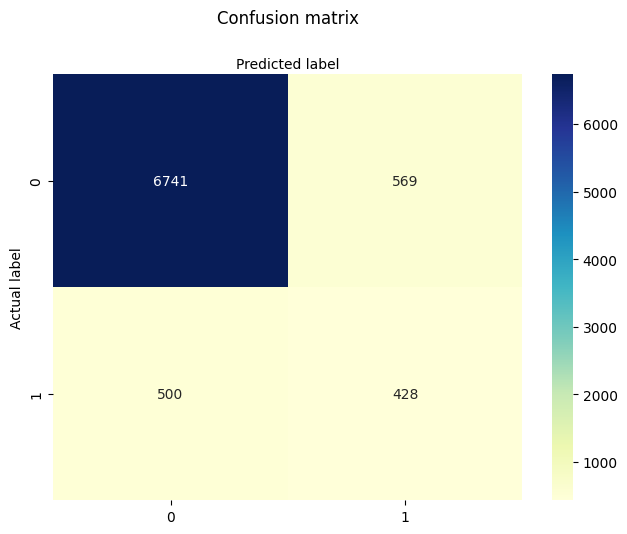

In [42]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Random Forest

### Penginplementasian Model Random Forest

In [43]:
model_Random_Forest = RandomForestClassifier()
model_Random_Forest.fit(x_train, y_train)

RandomForestClassifier()

In [44]:
y_pred = model_Random_Forest.predict(x_test)

print("Jumlah nilai 1 dalam y_pred : ", np.count_nonzero(y_pred == 1))
print("Jumlah nilai 0 dalam y_pred : ", np.count_nonzero(y_pred == 0))

Jumlah nilai 1 dalam y_pred :  725
Jumlah nilai 0 dalam y_pred :  7513


In [45]:
y_pred_train = model_Random_Forest.predict(x_train)
print("Jumlah nilai 1 dalam y_pred_train : ",
      np.count_nonzero(y_pred_train == 1))
print("Jumlah nilai 0 dalam y_pred_train : ",
      np.count_nonzero(y_pred_train == 0))

Jumlah nilai 1 dalam y_pred_train :  29230
Jumlah nilai 0 dalam y_pred_train :  29246


### Accuracy, Precision, Recall, F1-Score

In [46]:
# Evaluasi model pada data x_test
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("F1-Score  : ", f1)
print('Recall    : ', recall)
print('Precision : ', precision)
print('Accuracy  : ', accuracy)
print()
print(classification_report(y_test, y_pred))

F1-Score  :  0.500907441016334
Recall    :  0.44612068965517243
Precision :  0.5710344827586207
Accuracy  :  0.8998543335761107

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      7310
         1.0       0.57      0.45      0.50       928

    accuracy                           0.90      8238
   macro avg       0.75      0.70      0.72      8238
weighted avg       0.89      0.90      0.89      8238



### Confusion Matrix

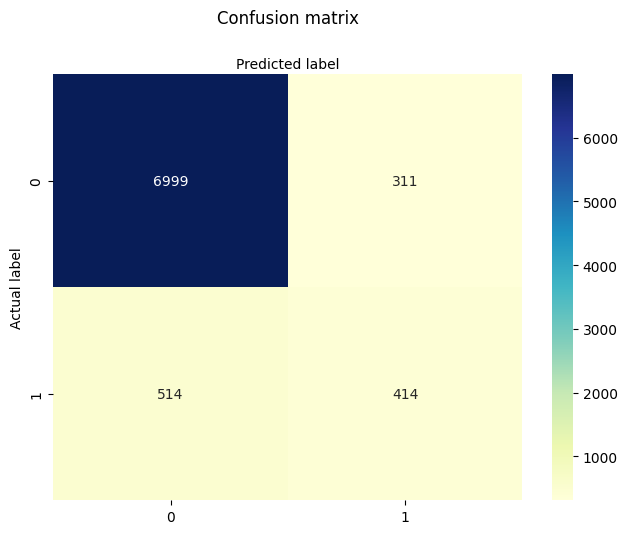

In [47]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Naive Bayes


### Penginplementasian Model Naive Bayes

In [48]:
model_Naive_Bayes = GaussianNB()
model_Naive_Bayes.fit(x_train, y_train)

GaussianNB()

In [49]:
y_pred = model_Naive_Bayes.predict(x_test)

print("Jumlah nilai 1 dalam y_pred : ", np.count_nonzero(y_pred == 1))
print("Jumlah nilai 0 dalam y_pred : ", np.count_nonzero(y_pred == 0))

Jumlah nilai 1 dalam y_pred :  1380
Jumlah nilai 0 dalam y_pred :  6858


In [50]:
y_pred_train = model_Naive_Bayes.predict(x_train)
print("Jumlah nilai 1 dalam y_pred_train : ",
      np.count_nonzero(y_pred_train == 1))
print("Jumlah nilai 0 dalam y_pred_train : ",
      np.count_nonzero(y_pred_train == 0))

Jumlah nilai 1 dalam y_pred_train :  20441
Jumlah nilai 0 dalam y_pred_train :  38035


### Accuracy, Precision, Recall, F1-Score

In [51]:
# Evaluasi model pada data x_test
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("F1-Score  : ", f1)
print('Recall    : ', recall)
print('Precision : ', precision)
print('Accuracy  : ', accuracy)
print()
print(classification_report(y_test, y_pred))

F1-Score  :  0.42634315424610053
Recall    :  0.5301724137931034
Precision :  0.3565217391304348
Accuracy  :  0.8392813789754795

              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      7310
         1.0       0.36      0.53      0.43       928

    accuracy                           0.84      8238
   macro avg       0.65      0.70      0.67      8238
weighted avg       0.87      0.84      0.85      8238



### Confusion Matrix

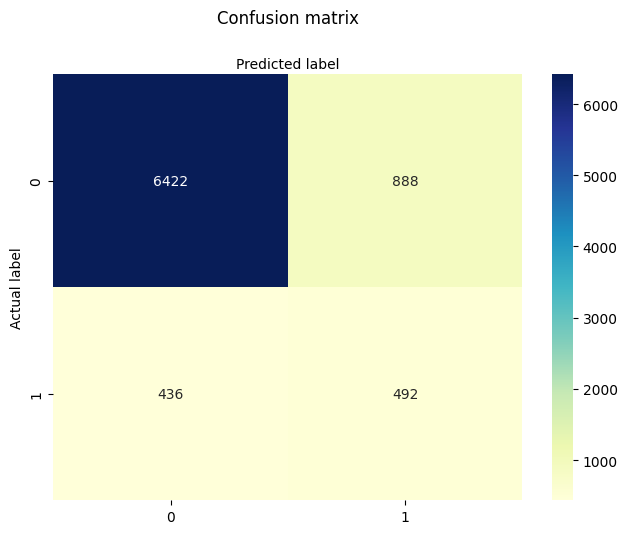

In [52]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Analisis Algoritma

Dalam melakukan analisis model machine learning untuk tugas klasifikasi, telah dilakukan uji coba menggunakan beberapa algoritma, antara lain Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Decision Trees, Random Forest, dan Naive Bayes. Berdasarkan hasil analisis tersebut, terungkap bahwa model Random Forest mampu mencapai akurasi tertinggi, yakni mencapai 89%, yang menunjukkan kinerja yang lebih unggul dibandingkan dengan model-model lainnya.

Keunggulan dari Random Forest terletak pada kemampuannya dalam mengurangi risiko overfitting dengan menggabungkan berbagai pohon keputusan, serta kemampuannya untuk menilai relatif pentingnya setiap fitur. Meskipun demikian, penggunaan Random Forest memerlukan tuning parameter yang hati-hati untuk mencapai hasil yang optimal.

K-Nearest Neighbors (KNN) juga memberikan hasil yang baik dengan akurasi sebesar 86%, menjadikannya model kedua terbaik. KNN lebih cocok digunakan pada data yang tidak memiliki hubungan linier antara fitur dan target, dan mampu memberikan performa yang baik dalam skenario tersebut.

Logistic Regression, meskipun memiliki akurasi yang lebih rendah, yakni sekitar 83%, memiliki kelebihan dalam kemudahan interpretasi. Model ini cocok digunakan pada data yang menunjukkan hubungan linier antara fitur dan target, serta dapat digunakan untuk klasifikasi biner atau multikelas.

Dalam konteks ini, pemilihan Logistic Regression diambil sebagai pilihan karena kemudahan interpretasi, kecepatan komputasi dibandingkan dengan SVM, dan kesesuaian dengan data target yang hanya memiliki dua nilai, yaitu "yes" dan "no". Logistic Regression juga cocok digunakan pada data klasifikasi yang melibatkan variabel seperti age, marital, education, dan lainnya, karena sesuai dengan sifat data yang dimiliki.